#Analisis de modelos de clasificacion

##Importacion de librerias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Carga de datos

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta del archivo en tu Drive
url = '/content/drive/MyDrive/Duoc/6TO SEMESTRE/Machine learning/Resultados_modelos/classification_results.parquet'

try:
    # Cargar correctamente un archivo PARQUET
    classification = pd.read_parquet(url)
    print("✅ Datos cargados exitosamente!")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Datos cargados exitosamente!


##Informacion general

In [6]:
print(f'Dimensiones iniciales: {classification.shape}')

Dimensiones iniciales: (5, 9)


In [7]:
print(f'Variables disponibles: {list(classification.columns)}')

Variables disponibles: ['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall', 'AUC_ROC', 'Best_Threshold', 'CV_AUC_Mean', 'CV_AUC_Std']


In [8]:
print("Vista previa de los resultados de clasificación:")
display(classification)

Vista previa de los resultados de clasificación:


,Model,Accuracy,F1_Score,Precision,Recall,AUC_ROC,Best_Threshold,CV_AUC_Mean,CV_AUC_Std
2,gradient_boosting,0.747945,0.658048,0.561662,0.794370,0.834903,0.458005,0.837023,0.006183
0,random_forest,0.743647,0.655450,0.555792,0.798654,0.834115,0.460644,0.836205,0.005261
3,knn,0.720478,0.606730,0.531797,0.706242,0.781003,0.571429,0.783035,0.004539
1,logistic,0.679746,0.592874,0.484472,0.763770,0.761650,0.453161,0.766186,0.008041
4,svm,0.669096,0.589381,0.474431,0.777846,0.760772,0.445881,0.765424,0.008081


##Analisis estadistico descritivo

In [9]:
metricas_principales = ["Accuracy", "F1_Score", "Precision", "Recall", "AUC_ROC", "CV_AUC_Mean"]

In [10]:
available_metrics = [m for m in metricas_principales if m in classification.columns]
print(f"Métricas disponibles: {available_metrics}")

Métricas disponibles: ['Accuracy', 'F1_Score', 'Precision', 'Recall', 'AUC_ROC', 'CV_AUC_Mean']


In [11]:
summary = classification.groupby("Model")[available_metrics].agg(["mean", "std"]).round(4)

In [12]:
formatted_summary = pd.DataFrame()
for metric in available_metrics:
    if metric in summary.columns.levels[0]:
        formatted_summary[f"{metric} (mean ± std)"] = summary[metric].apply(
            lambda x: f"{x['mean']:.4f} ± {x['std']:.4f}", axis=1
        )
display(formatted_summary)

,Accuracy (mean ± std),F1_Score (mean ± std),Precision (mean ± std),Recall (mean ± std),AUC_ROC (mean ± std),CV_AUC_Mean (mean ± std)
Model,,,,,,
gradient_boosting,0.7479 ± nan,0.6580 ± nan,0.5617 ± nan,0.7944 ± nan,0.8349 ± nan,0.8370 ± nan
knn,0.7205 ± nan,0.6067 ± nan,0.5318 ± nan,0.7062 ± nan,0.7810 ± nan,0.7830 ± nan
logistic,0.6797 ± nan,0.5929 ± nan,0.4845 ± nan,0.7638 ± nan,0.7616 ± nan,0.7662 ± nan
random_forest,0.7436 ± nan,0.6554 ± nan,0.5558 ± nan,0.7987 ± nan,0.8341 ± nan,0.8362 ± nan
svm,0.6691 ± nan,0.5894 ± nan,0.4744 ± nan,0.7778 ± nan,0.7608 ± nan,0.7654 ± nan


##Visualizacion comparativa

###Comparación de F1 Score

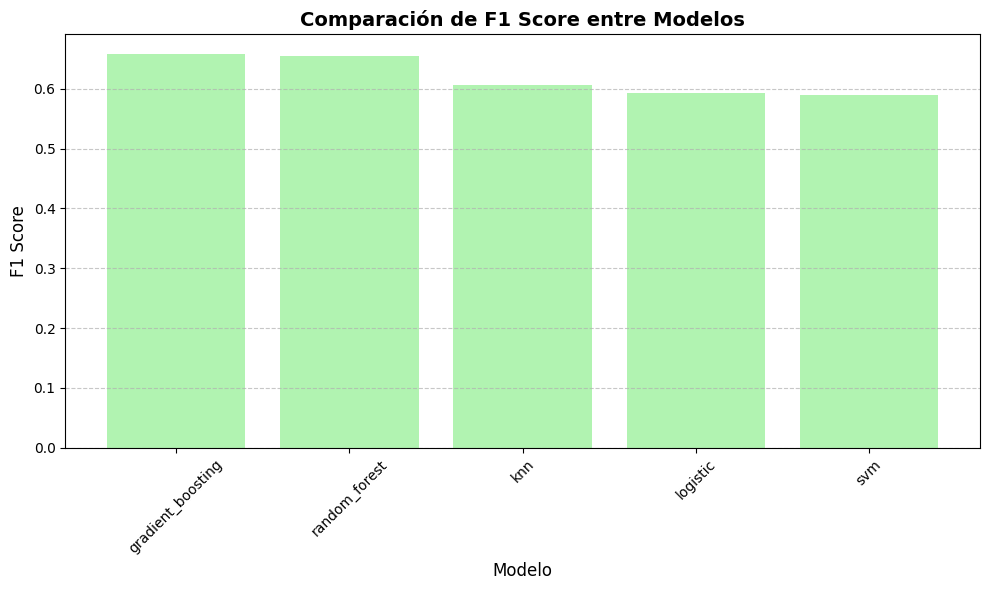

In [13]:
plt.figure(figsize=(10, 6))
if "F1_Score" in classification.columns:
    f1_data = classification.groupby("Model")["F1_Score"].agg(['mean', 'std']).sort_values('mean', ascending=False)
    plt.bar(f1_data.index, f1_data['mean'], yerr=f1_data['std'], capsize=5, alpha=0.7, color='lightgreen')
    plt.title("Comparación de F1 Score entre Modelos", fontsize=14, fontweight='bold')
    plt.ylabel("F1 Score", fontsize=12)
    plt.xlabel("Modelo", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

###Comparación de AUC-ROC

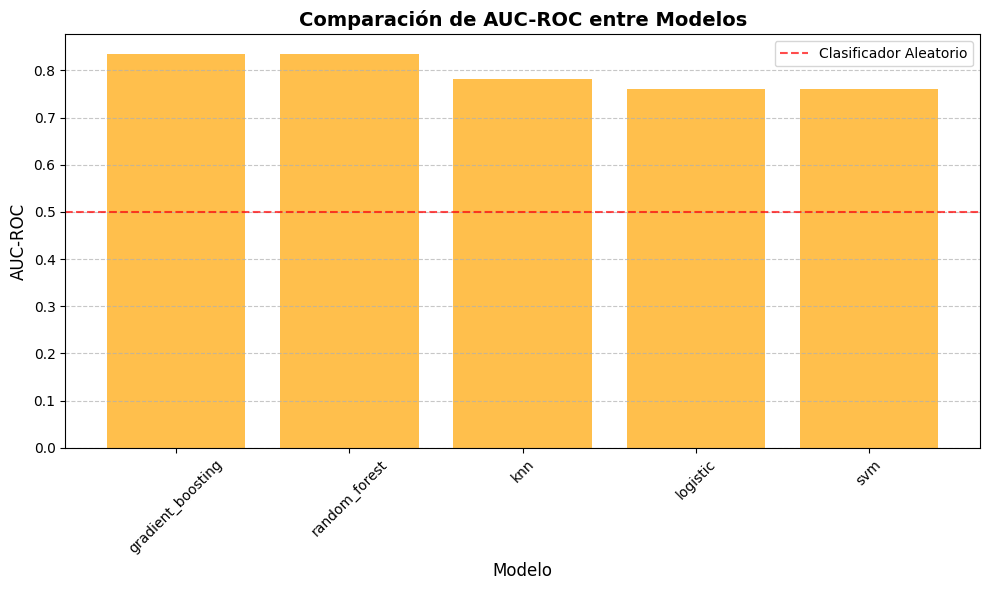

In [14]:
plt.figure(figsize=(10, 6))
if "AUC_ROC" in classification.columns:
    auc_data = classification.groupby("Model")["AUC_ROC"].agg(['mean', 'std']).sort_values('mean', ascending=False)
    plt.bar(auc_data.index, auc_data['mean'], yerr=auc_data['std'], capsize=5, alpha=0.7, color='orange')
    plt.title("Comparación de AUC-ROC entre Modelos", fontsize=14, fontweight='bold')
    plt.ylabel("AUC-ROC", fontsize=12)
    plt.xlabel("Modelo", fontsize=12)
    plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Clasificador Aleatorio')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

###Heatmap de métricas

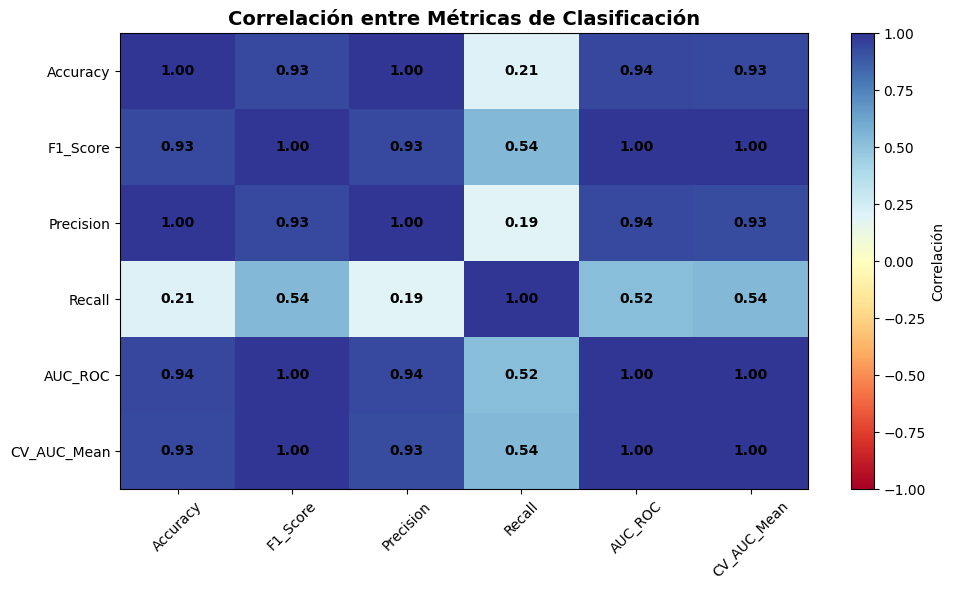

In [15]:
if len(available_metrics) >= 3:
    plt.figure(figsize=(10, 6))
    correlation_matrix = classification[available_metrics].corr()
    plt.imshow(correlation_matrix, cmap='RdYlBu', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(label='Correlación')
    plt.xticks(range(len(available_metrics)), available_metrics, rotation=45)
    plt.yticks(range(len(available_metrics)), available_metrics)
    plt.title("Correlación entre Métricas de Clasificación", fontsize=14, fontweight='bold')

    # Añadir valores de correlación
    for i in range(len(available_metrics)):
        for j in range(len(available_metrics)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                    ha='center', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

###Precision vs Recall scatter plot

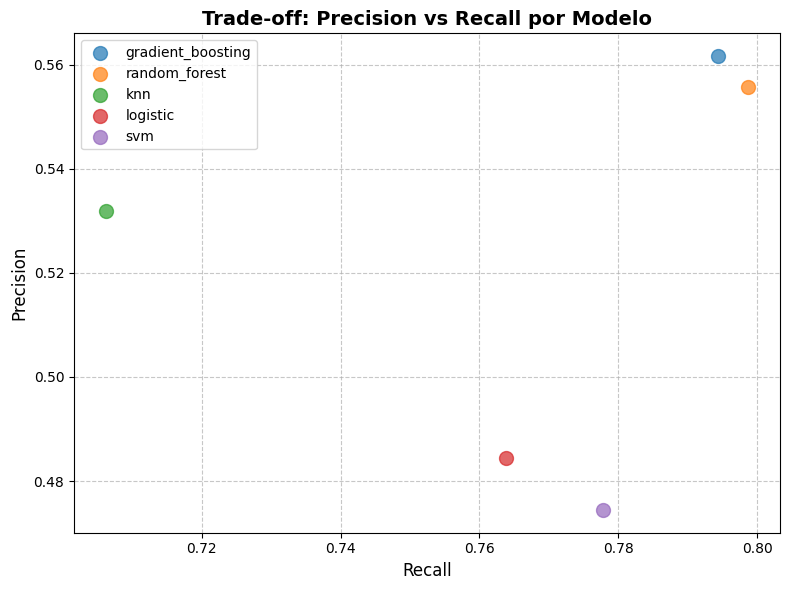

In [16]:
if all(metric in classification.columns for metric in ['Precision', 'Recall']):
    plt.figure(figsize=(8, 6))
    for model in classification['Model'].unique():
        model_data = classification[classification['Model'] == model]
        plt.scatter(model_data['Recall'].mean(), model_data['Precision'].mean(),
                   label=model, s=100, alpha=0.7)

    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Trade-off: Precision vs Recall por Modelo', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

##Identificacion de mejores moddelos

###Buscar mejor modelo por F1 Score, AUC-ROC y CV AUC

In [17]:
#F1 Score
if "F1_Score" in classification.columns:
    best_f1_idx = classification["F1_Score"].idxmax()
    best_f1_model = classification.loc[best_f1_idx, "Model"]
    best_f1_score = classification.loc[best_f1_idx, "F1_Score"]
    print(f"🔹 Mejor modelo por F1 Score: {best_f1_model}")
    print(f"   F1 Score: {best_f1_score:.4f}")

#AUC-ROC
if "AUC_ROC" in classification.columns:
    best_auc_idx = classification["AUC_ROC"].idxmax()
    best_auc_model = classification.loc[best_auc_idx, "Model"]
    best_auc_score = classification.loc[best_auc_idx, "AUC_ROC"]
    print(f"\n🔹 Mejor modelo por AUC-ROC: {best_auc_model}")
    print(f"   AUC-ROC: {best_auc_score:.4f}")

#CV AUC
if "CV_AUC_Mean" in classification.columns:
    best_cv_idx = classification["CV_AUC_Mean"].idxmax()
    best_cv_model = classification.loc[best_cv_idx, "Model"]
    best_cv_score = classification.loc[best_cv_idx, "CV_AUC_Mean"]
    best_cv_std = classification.loc[best_cv_idx, "CV_AUC_Std"]
    print(f"\n🔹 Mejor modelo por Validación Cruzada: {best_cv_model}")
    print(f"   CV AUC: {best_cv_score:.4f} ± {best_cv_std:.4f}")

🔹 Mejor modelo por F1 Score: gradient_boosting
   F1 Score: 0.6580

🔹 Mejor modelo por AUC-ROC: gradient_boosting
   AUC-ROC: 0.8349

🔹 Mejor modelo por Validación Cruzada: gradient_boosting
   CV AUC: 0.8370 ± 0.0062


##Analisis de balance y threshulds

In [18]:
print("\n📊 BALANCE PRECISION-RECALL:")
if all(metric in classification.columns for metric in ['Precision', 'Recall']):
    balance_analysis = classification[['Model', 'Precision', 'Recall']].copy()
    balance_analysis['Precision-Recall Balance'] = balance_analysis['Precision'] - balance_analysis['Recall']
    balance_analysis['Balance Absoluto'] = abs(balance_analysis['Precision-Recall Balance'])

    # Identificar modelo más balanceado
    most_balanced_idx = balance_analysis['Balance Absoluto'].idxmin()
    most_balanced_model = balance_analysis.loc[most_balanced_idx, 'Model']

    print(f"🔹 Modelo más balanceado: {most_balanced_model}")
    print(f"   Diferencia Precision-Recall: {balance_analysis.loc[most_balanced_idx, 'Precision-Recall Balance']:.4f}")
    display(balance_analysis.round(4))


📊 BALANCE PRECISION-RECALL:
🔹 Modelo más balanceado: knn
   Diferencia Precision-Recall: -0.1744


,Model,Precision,Recall,Precision-Recall Balance,Balance Absoluto
2,gradient_boosting,0.5617,0.7944,-0.2327,0.2327
0,random_forest,0.5558,0.7987,-0.2429,0.2429
3,knn,0.5318,0.7062,-0.1744,0.1744
1,logistic,0.4845,0.7638,-0.2793,0.2793
4,svm,0.4744,0.7778,-0.3034,0.3034


In [19]:
if "Best_Threshold" in classification.columns:
    print("\n🎯 ANÁLISIS DE THRESHOLDS ÓPTIMOS:")
    threshold_analysis = classification[['Model', 'Best_Threshold', 'Precision', 'Recall']].copy()
    threshold_analysis = threshold_analysis.sort_values('Best_Threshold', ascending=False)
    display(threshold_analysis.round(4))


🎯 ANÁLISIS DE THRESHOLDS ÓPTIMOS:


,Model,Best_Threshold,Precision,Recall
3,knn,0.5714,0.5318,0.7062
0,random_forest,0.4606,0.5558,0.7987
2,gradient_boosting,0.4580,0.5617,0.7944
1,logistic,0.4532,0.4845,0.7638
4,svm,0.4459,0.4744,0.7778


##Evaluacion de calidad

In [20]:
print("\n📊 EVALUACIÓN DE CALIDAD POR AUC-ROC:")
if "AUC_ROC" in classification.columns:
    auc_scores = classification.groupby("Model")["AUC_ROC"].mean()

    for model, auc in auc_scores.items():
        if auc >= 0.9:
            rating = "Excelente 🏆"
        elif auc >= 0.8:
            rating = "Muy Bueno ⭐"
        elif auc >= 0.7:
            rating = "Bueno ✅"
        elif auc >= 0.6:
            rating = "Aceptable ⚠️"
        else:
            rating = "Pobre ❌"
        print(f"   {model}: {auc:.4f} - {rating}")


📊 EVALUACIÓN DE CALIDAD POR AUC-ROC:
   gradient_boosting: 0.8349 - Muy Bueno ⭐
   knn: 0.7810 - Bueno ✅
   logistic: 0.7616 - Bueno ✅
   random_forest: 0.8341 - Muy Bueno ⭐
   svm: 0.7608 - Bueno ✅


In [21]:
print("\n💡 RECOMENDACIÓN PARA PRODUCCIÓN:")
if all(metric in classification.columns for metric in ['F1_Score', 'AUC_ROC', 'CV_AUC_Mean']):
    # Calcular score compuesto
    classification['Composite_Score'] = (
        classification['F1_Score'] * 0.4 +
        classification['AUC_ROC'] * 0.4 +
        classification['CV_AUC_Mean'] * 0.2
    )

    best_composite_idx = classification['Composite_Score'].idxmax()
    best_composite_model = classification.loc[best_composite_idx, 'Model']

    print(f"🔹 Modelo recomendado: {best_composite_model}")
    print(f"   Score compuesto: {classification.loc[best_composite_idx, 'Composite_Score']:.4f}")
    print(f"   • F1 Score: {classification.loc[best_composite_idx, 'F1_Score']:.4f}")
    print(f"   • AUC-ROC: {classification.loc[best_composite_idx, 'AUC_ROC']:.4f}")
    print(f"   • CV AUC: {classification.loc[best_composite_idx, 'CV_AUC_Mean']:.4f}")


💡 RECOMENDACIÓN PARA PRODUCCIÓN:
🔹 Modelo recomendado: gradient_boosting
   Score compuesto: 0.7646
   • F1 Score: 0.6580
   • AUC-ROC: 0.8349
   • CV AUC: 0.8370


In [22]:
print("\n🏆 MEJOR MODELO DE CLASIFICACIÓN Y JUSTIFICACIÓN")
print("=" * 50)

# Definir la métrica principal para clasificación
metrica_principal_clasificacion = "F1_Score"

# Encontrar el mejor modelo basado en F1 Score (la métrica más balanceada para clasificación)
if metrica_principal_clasificacion in classification.columns:
    mejor_modelo_clasificacion = classification.loc[classification[metrica_principal_clasificacion].idxmax()]

    print(f"🎯 EL MEJOR MODELO DE CLASIFICACIÓN ES: {mejor_modelo_clasificacion['Model']}")
    print(f"📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor F1 Score ({mejor_modelo_clasificacion[metrica_principal_clasificacion]:.4f})")
    print("\n📈 MÉTRICAS DESTACADAS DEL MEJOR MODELO:")
    print(f"   • F1 Score: {mejor_modelo_clasificacion['F1_Score']:.4f}")
    print(f"   • Precision: {mejor_modelo_clasificacion['Precision']:.4f}")
    print(f"   • Recall: {mejor_modelo_clasificacion['Recall']:.4f}")
    print(f"   • AUC-ROC: {mejor_modelo_clasificacion['AUC_ROC']:.4f}")
    if 'CV_AUC_Mean' in mejor_modelo_clasificacion:
        print(f"   • CV AUC: {mejor_modelo_clasificacion['CV_AUC_Mean']:.4f} ± {mejor_modelo_clasificacion['CV_AUC_Std']:.4f}")

    # Información adicional sobre el threshold óptimo si está disponible
    if 'Best_Threshold' in mejor_modelo_clasificacion:
        print(f"   • Threshold óptimo: {mejor_modelo_clasificacion['Best_Threshold']:.4f}")
else:
    # Fallback a AUC si F1 no está disponible
    if "AUC_ROC" in classification.columns:
        mejor_modelo_clasificacion = classification.loc[classification["AUC_ROC"].idxmax()]
        print(f"🎯 EL MEJOR MODELO DE CLASIFICACIÓN ES: {mejor_modelo_clasificacion['Model']}")
        print(f"📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor AUC-ROC ({mejor_modelo_clasificacion['AUC_ROC']:.4f})")
    else:
        print("⚠️ No se pudo determinar el mejor modelo - métricas principales no disponibles")


🏆 MEJOR MODELO DE CLASIFICACIÓN Y JUSTIFICACIÓN
🎯 EL MEJOR MODELO DE CLASIFICACIÓN ES: gradient_boosting
📊 JUSTIFICACIÓN: Se seleccionó basado en el mayor F1 Score (0.6580)

📈 MÉTRICAS DESTACADAS DEL MEJOR MODELO:
   • F1 Score: 0.6580
   • Precision: 0.5617
   • Recall: 0.7944
   • AUC-ROC: 0.8349
   • CV AUC: 0.8370 ± 0.0062
   • Threshold óptimo: 0.4580


##Conclusión

El modelo Gradient Boosting se ha identificado como el mejor clasificador, alcanzando un F1 Score de 0.6580, lo que refleja un desempeño equilibrado entre precisión y sensibilidad. Este modelo demuestra una buena capacidad para identificar correctamente los casos positivos (Recall de 0.7944), manteniendo a la vez una precisión aceptable (0.5617). Además, su AUC-ROC de 0.8349 evidencia una excelente capacidad discriminativa, muy superior al azar y destacando frente a los demás modelos evaluados.

El threshold óptimo de 0.4580 permite optimizar la relación entre Precision y Recall, mejorando el balance general del clasificador. Dado su rendimiento consistente y su estabilidad en validación cruzada (CV AUC: 0.8370 ± 0.0062), se considera que el modelo está bien generalizado y listo para su implementación en entornos de prueba o productivos.